In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
    for row in rows:
        listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

In [158]:
data=np.load('fit_exercise.npy')

In [159]:
def recta(x,parameters):
    r=parameters[0]*x+parameters[1]
    return r


def xisq(x,y,sigma,modelo,parameters):
    xi=((y-modelo(x,parameters))/sigma)**2
    r=np.sum(xi)    
    return r

<ErrorbarContainer object of 3 artists>

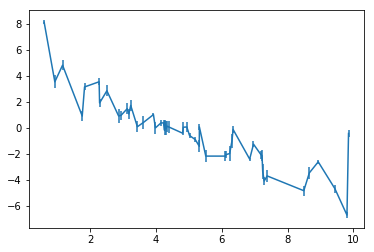

In [160]:
plt.errorbar(data[0],data[1],yerr=data[2])

In [165]:
red=10
parameters=pd.DataFrame([np.linspace(-2,0,num=red),np.linspace(4,8,num=red)])

a=pd.DataFrame(np.zeros([red,red]))
for i in range(0,red):
    for j in range(0,red):
        p1=parameters.iloc[0,i]
        p2=parameters.iloc[1,j]
        a[i][j]=xisq(data[0],data[1],data[2],recta,[p1,p2])

p=[parameters.iloc[0,getIndexes(a,a.min().min())[0][1]],parameters.iloc[1,getIndexes(a,a.min().min())[0][0]]]
p

[-1.1111111111111112, 5.333333333333333]

In [ ]:
for i in range(0,red):
    a[i][j]=xisq(data[0],data[1],data[2],recta,[p1,p2])

p=[parameters.iloc[0,getIndexes(a,a.min().min())[0][1]],parameters.iloc[1,getIndexes(a,a.min().min())[0][0]]]

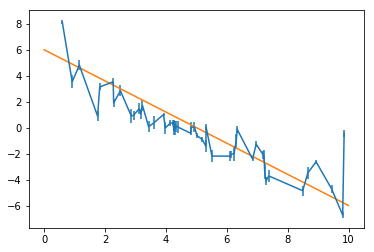

In [163]:
x=np.linspace(0,10,num=100)
y=recta(x,p)
plt.errorbar(data[0],data[1],yerr=data[2])
plt.plot(x,y)